# Static Visualization with `matplotlib`

## Loading data

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Import example data - flight from NAAMES campaign
naames = pd.read_csv('data/naames-mrg01-c130_merge_20151112_R5_thru20151114.csv', skiprows=223)
# Filter down to just 1 day
naames = naames[naames[' Fractional_Day'] < 317]

## Context

Viewing your data is an integral part of the science process and it happens at many steps along the way. Reasons you may want to plot include:

1. view your data for a quick check
2. answer a science question (often iterative)
3. create final plots for publication

The reason why you are plotting influences how you might choose to plot. Are you trying to make a high-quality plot for publication? Or are you just trying to get an easy glance at your data to make sure nothing is amiss? You'll likely have to do both.

### Choosing a plotting technique: Ease vs. Complexity

One way the goal of plotting can influence your technology choice is by influencing how much time you are willing to trade for control over detailed aspects of your plot. This tradeoff is summarized below.

![Ease vs Complexity](./images/ease_vs_complexity.jpg)

We see that `matplotlib`, the library being used here, is able to make highly sophisticated but potentially time consuming plots. On the opposite end of the spectrum from `matplotlib` are other plotting libraries, such as `seaborn` or `altair`. I also consider the plotting functions built into pandas to be located on the "Ease of use" end of the spectrum.

### Plotting for a quick data check

Here is an example of using the plotting libraries built into `pandas` to make a quick plot.

<AxesSubplot:xlabel=' BC_mass', ylabel=' ALTP'>

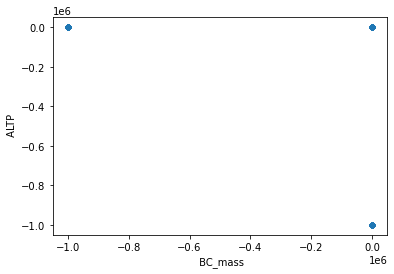

In [13]:
naames.plot.scatter(x=' BC_mass', y = ' ALTP')

What did we learn in this quick plot? The first thing we see is that there is likely some data that has a NAN value we did't account for. This is likely because two of the way that we see all of the dots located in exactly the same spot in three locations. Let's remove those and try again.

<AxesSubplot:xlabel=' BC_mass', ylabel=' ALTP'>

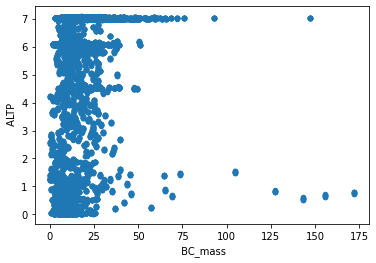

In [14]:
# Remove NaN values
naames = naames.replace(-999999, np.nan)

# naames.plot.scatter(x=' Fractional_Day', y=' ALTP')
naames.plot.scatter(x=' BC_mass', y = ' ALTP')

Much better!  What did we learn this time?
- We can see a loose distribution of values: the altitude measurements appear to be about equal, which the black carbon measurements seem to be clustered towards the smaller values.
- We see the range of values: 0 -> 175 for Black Carbon and 0 -> 7 for Altitude

Making plots like this is a great thing when you first open a dataset.

### Object Class

When plotting in Python it is often really important to pay attention to the type, or class, or object that you are working with. As we will see, many pieces of a plot from axes, to colorbars to gridlines, can have their own type of object. You can't do the same things on a colorbar object as an axes object so noticing the difference is important, especially when readying Stack Overflow.

If you are ever confused about what type of object you have you can access the `.__class__` attribute on most any variable in Python to see what type of object it is. We call the type of object the **class**, hence the name of that method.

In [4]:
# `naames` is a DataFrame
naames.__class__

pandas.core.frame.DataFrame

## `matplotlib` Concepts

### 1. Different parts of a graph are seperate objects

Plots in Matplotlib or organized as a collection of overlapping objects.  Each object can be created independently accessed, although it doesn't have to be.

A few of the most important objects to start with are **figure**, **axes** and **axis**.

<img src="https://files.realpython.com/media/fig_map.bc8c7cabd823.png">


It isn't always clear that the plot holds independent objects because lots of functions in matplotlib create several objects at once.  But know that under the hood each part of a plot is its own entity.

Without looking too much at code yet, let's look at the following example to see the difference between a figure and axes.

In [5]:
import matplotlib.pyplot as plt

Here we make a plot that is just a figure with a set of axes.

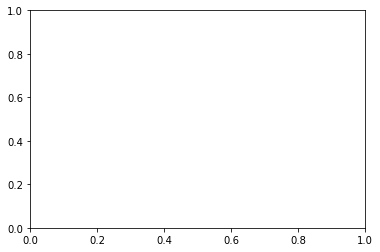

In [6]:
fig = plt.figure()
ax = plt.axes()

Now let's change the color of the figure (`fig`) and the axes (`ax`) to see how they occupy different parts of the plot.

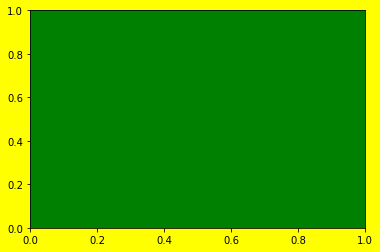

In [7]:
# Try commenting out either of the last two lines to see how the figure changes
fig = plt.figure()
ax = plt.axes()
fig.set_facecolor('yellow')  # changing the color of the figure
ax.set_facecolor('green')  # changing the color of the axes

Distinguishin between figure and axes seems redundant when you have a single dataset to show, but if you start adding multiple axes into a figure the distinction becomes more clear. 

### 2. Objects are stacked from the bottom up

Everytime you add something new to a matplotlib figure it gets layered onto the plot it gets added to the top of the plot in the order it was created. I think of matplotlib as being a large, blank canvas. You can add most anything you want anywhere you want, but after each new thing you have to stop and let the paint dry. Anything you paint after that gets added on top of your previous layer of paint.

Let's look at an example of this, again, without getting too bogged down on the code.

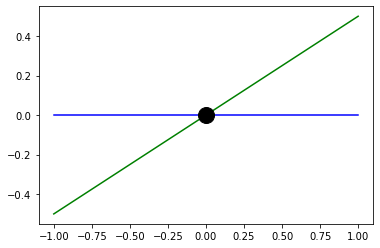

In [8]:
plt.plot([0], [0], color='red', marker = 'o')  # create red dot at 0,0
plt.plot([-1, 0, 1], [0, 0, 0], color='blue') # create a blue horizontal line
plt.plot([-1, 0, 1],[-0.5, 0, 0.5], color='green') # create a green diagonal line
plt.plot([0], [0], color='black', marker='o', markersize=16) # make a large black dot at 0,0

Above we see different aspects of the plot being added, one on top of each other. The black dot, which comes last, even totally covers up the red dot in the first line. 

Try moving around the different lines in the code cell above to see the different shapes get layered differently.

:::{admonition} 🌀 More Info: Rendering Order
:class: note, dropdown

What is said here about ordering is true, but with some slight caveats. To read more about the technicality of layering, checkout the [zorder matplotlib demo](https://matplotlib.org/stable/gallery/misc/zorder_demo.html).

:::

## Plotting APIs

A strength and a weakness of matplotlib is that there are many ways to create exactly the same plot. The two major approaches, or APIs, are:
1. pyplot API - uses `plt.plot()` to change the plot
2. object-oriented (OOP) API - uses `fig, ax = subplots()` to create `fig` and `ax` objects. Changes are then made by manipulating `fig` and `ax` directly.

Option 1 is less code and easier to approach, but it gives less control. Option 2 gives more control but it is more complicated. This is a classic programming tradeoff. We will look at both here.


:::{admonition} 📝 Check your understanding
:class: tip

Give 2 examples of matplotlib objects. What do each of the 3 object represent?

:::

### Method 1: Using `plt.plot()`, "The pyplot Interface"

The `plt.plot()` method is a one-line command to make a plot. The format is:
> `plt.plot(x, y)`
Where `x` and `y` are arrays of data that you want on each the `x` and `y` axis.

#### Step 1: Organize our data

In [9]:
x = naames[' Fractional_Day']
y = naames[' ALTP']

#### Step 2: Make our graph

In [10]:
import matplotlib.pyplot as plt

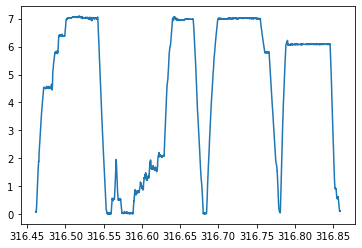

In [11]:
plt.plot(x,y)

Even though we didn't explicitly create a figure, axes, axis, line, axis labels, or tick marks they were all created together with `plt.plot()`.  If we want to change something about any of those elements or add elements that don't exist right now we do that by using methods on the `plt` object.

Text(0, 0.5, 'Altitude')

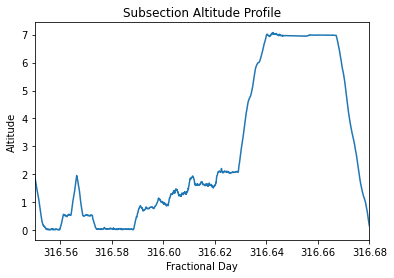

In [12]:
plt.plot(x, y)
plt.xlim(316.55, 316.68)  # changing the existing x axis scale
plt.title('Subsection Altitude Profile')  # adding a title
plt.xlabel('Fractional Day')   # adding a label on the x axis
plt.ylabel('Altitude')  # adding a label on the y axis

How do you find out where all those options (ex. `plt.xlabel()`) came from? Realistically, you probably reference code example you found online. There are truly thousands of commands so googling is really an important skill while plotting.

The other way you could have found the options was my looking at the documentation. There are several ways to customize your figure which are captured in the [`plt.plot()` docs page](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). Reading documentation has a learning curve and it takes practice, but it is often helpful once you get oriented.

In [13]:
plt.rcParams["figure.figsize"] = (15,3)  # Changing the size of the plot

In [14]:
# Get a smaller chunk of data so we can see the different marker types
naames_subset = naames.iloc[:100]

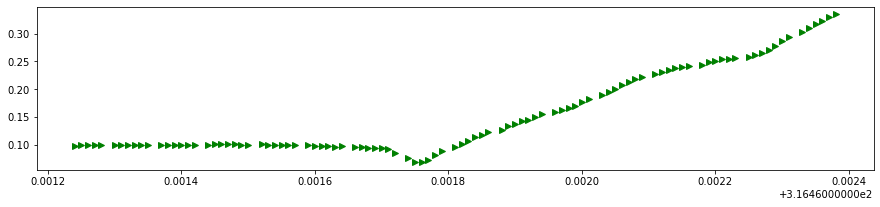

In [15]:
plt.plot(naames_subset[' Fractional_Day'], naames_subset[' ALTP'], 'g>')

In addition to `plt.plot()` there are a dozen or so other types of plots you can make that operate in the same way as `plt.plot()`.  A list of all the options is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).

Vocabulary is important while googling. The figure below shows the words matplotlib uses to refer to parts of a plot. It's a nice reference when figuring out your phrasing in a gogole search.

<img src='https://files.realpython.com/media/anatomy.7d033ebbfbc8.png'>

_Image from the [matplotlib usage guide](https://matplotlib.org/stable/tutorials/introductory/usage.html#figure-parts)_

:::{admonition} 📝 Check your understanding
:class: tip

Create a line plot using either `' UTC'`, `' Fractional_Day'` or `' INDEX'` as the x axis, and another column as your y axis. Some possible y axis columns could be: `' SO4_LARGE'`, `'  CCN_SS30_LARGE'`, `' Toluene_MixingRatio'`, or `' AOD-452nm_4STAR'`. 

:::

### More types of plots
In addition to `plt.plot()`, which creates a line plot, there are a dozen or so other types of plots you can make that operate in the same way as `plt.plot()`.  A list of all the options is [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).

#### Example: scatter plot

Text(0.5, 1.0, 'CO Mixing Ratio vs. Time')

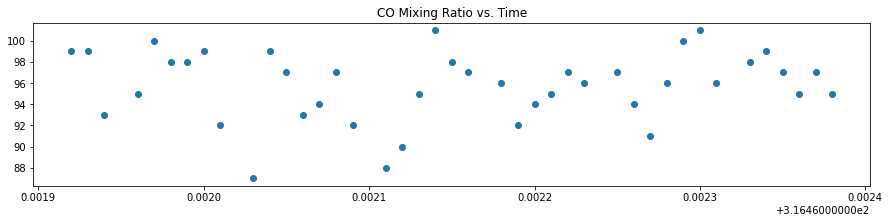

In [16]:
plt.scatter(naames_subset[' Fractional_Day'], naames_subset[' CO_MixingRatio_LARGE'])
plt.title('CO Mixing Ratio vs. Time')

#### Example: histogram

Text(0.5, 0, 'Carbon Monoxide Mixing Ratio (LARGE)')

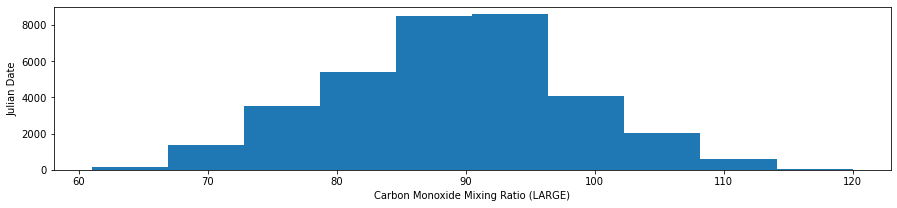

In [17]:
plt.hist(naames[' CO_MixingRatio_LARGE'])
plt.ylabel('Julian Date')
plt.xlabel('Carbon Monoxide Mixing Ratio (LARGE)')

While you can read [the API docs](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) to see every possible function available to you, I often prefer to peruse [the example gallery](https://matplotlib.org/stable/gallery/index.html). 

### Method 2: Accessing the `figure` with `plt.subplots()`, "The object oriented API"

It's been said now that this method is more complicated, but has broader functionality. Let's see what that means with an example.

To start let's recreate our good ol' figure and axes combo.

(<Figure size 1080x216 with 1 Axes>, <AxesSubplot:>)

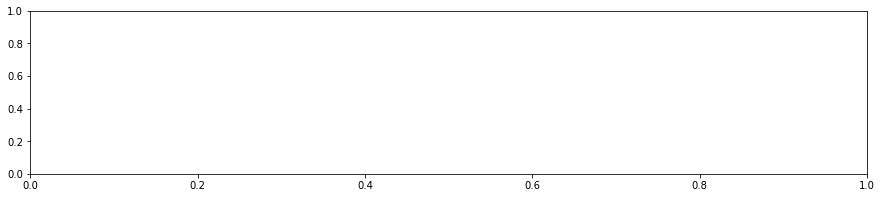

In [18]:
plt.subplots()

Looks good. But what is so different about this method? In order to do anything with this figure/axes we need to use that command to create figure and axes objects. Those objects are what we will build the rest of the plot around.

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


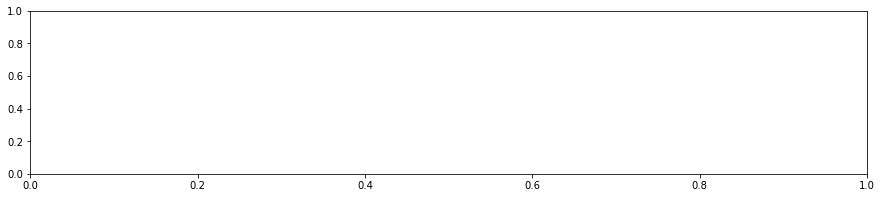

In [19]:
fig, ax  = plt.subplots()
print(fig.__class__)
print(ax.__class__)

Now let's add some data to the axes object.

Text(0.5, 1.0, 'Altitude')

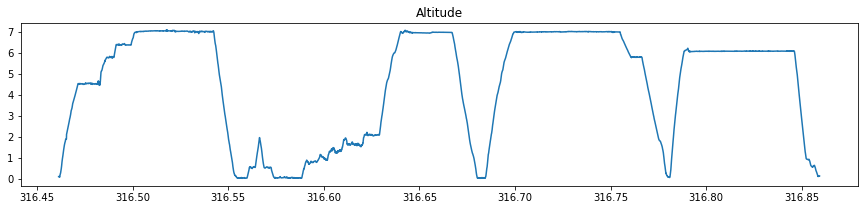

In [20]:
fig, ax = plt.subplots()
ax.plot(x, y)  # Instead of plt.plot() we use ax.plot()
ax.set_title('Altitude')

And there we have a plot of alitutde!

Why go through this longer method of creating a simple plot? One feature that `subplots()` has that `plt.plot()` doesn't is the ability to have multiple axes on the same figure.

Text(0.5, 1.0, 'CO Mixing Ratio')

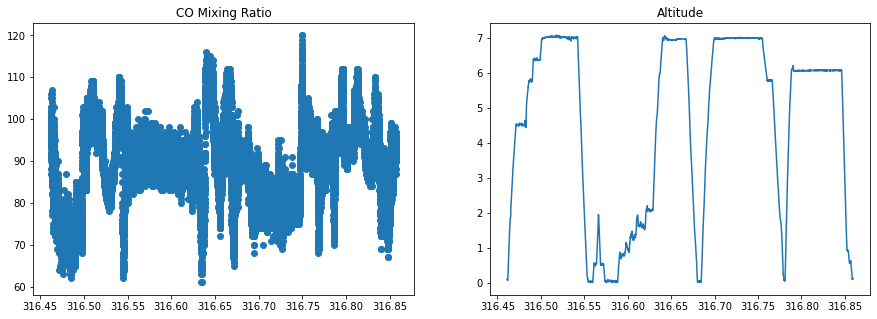

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
ax2.plot(x, y)
ax2.set_title('Altitude')
ax1.scatter(x, y=naames[' CO_MixingRatio_LARGE'])
ax1.set_title('CO Mixing Ratio')

Notice here that we used `ax.plot()` to create a line plot for altitude, but we used `ax.scatter()` for CO Mixing Ratio to create individual points for each observation.

:::{admonition} 📝 Check your understanding
:class: tip

Read the following block of code. Draw a plot that shows what you expect the output to be.

```
x = naames[' Fractional_Day']

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig.set_size_inches(15, 5)

ax1.plot(x, naames[' ALTP'])
ax1.set_title('Altitude')

ax2.scatter(x, y=naames[' CO_MixingRatio_LARGE'])
ax2.set_title('CO Mixing Ratio')

ax3.hist(' BC_mass')
ax3.set_title('Distribution of Black carbon')
```

:::

### Group practice - Evolving our Time Series plot

Steps:
* zoom into a subsection of the flight
* time plot, methanol
* color by another value
* add CO mixing ratio to the plot
* 2 axis labels
* add a legend

When googling:
- In each example you find, be sure to take note of how the person created their plot object. If they specified figure and axes, what did they name them?

In [24]:
naames[' H2O_MixingRatio_LARGE'].describe()

count    34196.000000
mean      1070.046350
std       1547.211618
min         -1.000000
25%         -1.000000
50%        191.000000
75%       1506.250000
max       5370.000000
Name:  H2O_MixingRatio_LARGE, dtype: float64

Resource for problem solving: (double axes) https://matplotlib.org/3.5.0/gallery/subplots_axes_and_figures/two_scales.html 

In [25]:
from datetime import datetime

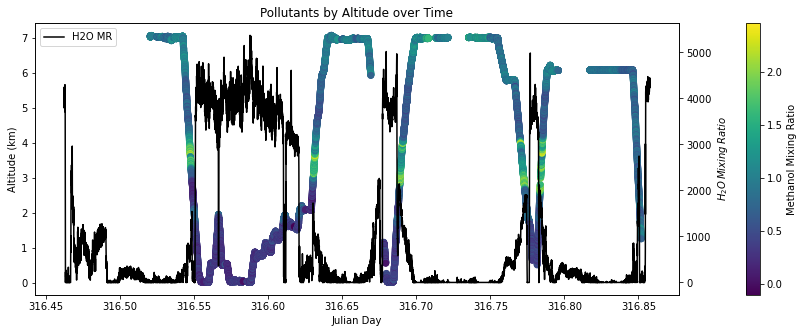

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

fig.set_size_inches(15, 5)

ax2.plot(x, naames[' H2O_MixingRatio_LARGE'], color='black', label='H2O MR')
ax2.set_ylabel('$H_{2}O\:Mixing\:Ratio$')
ax2.legend(loc='upper left')

scatter1 = ax1.scatter(x, y, c=naames[' Methanol_MixingRatio'])
ax1.set_ylabel('Altitude (km)')

ax1.set_title('Pollutants by Altitude over Time')
ax1.set_xlabel('Julian Day')

cb = fig.colorbar(scatter1, ax=ax1, label="Methanol Mixing Ratio", pad = 0.08)  # orientation = horizontal

# error example - trying to color a line plot by another column

In [28]:
naames['Datetime'] = pd.to_datetime('2014-12-31') + pd.to_timedelta(x, unit='D')

In [30]:
import matplotlib.dates

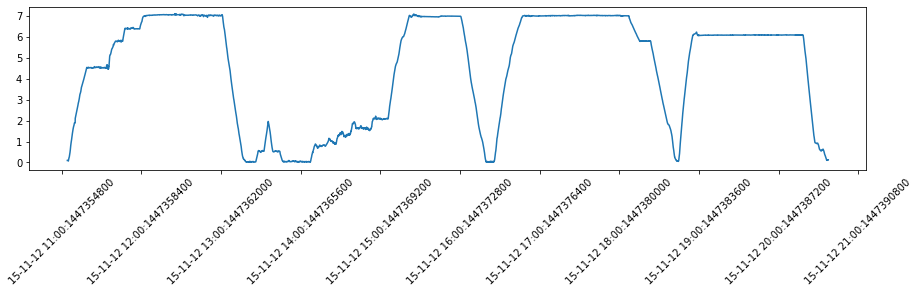

In [31]:
fig, ax = plt.subplots()
ax.plot(naames['Datetime'], naames[' ALTP'])
plt.xticks(rotation=45)
ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%y-%m-%d %H:%M:%s'))

Good example of SO showing pyplot and OOP version https://stackoverflow.com/questions/6063876/matplotlib-colorbar-for-scatter


## Which method should I use?

There is no correct strategy. A variety of different opinions I have encountered are:
- Start with `plt.plot()` because it is simpler and switch to `subplots()` if it seems like you need something that `plt.plot()` can't do
- Always just start with `subplots()` because no matter what you won't have to change methods
- Google first for an example of the type of plot you want to make and follow whatever method the example uses.

It will take time to develop your favorite strategy. To start I'd pick something that sounds right to you. Trying something out and developing preferences is a fun part of programming - it's a tangible sign of experience!

## Closing concepts

### Concept 1: Building on top of `matplotlib`

You may not need the specific control that `matplotlib` gives in which case you may choose to use another library. Because `matplotlib` is the old standby of the Python plotting world you are often still using `matplotlib`.  This is described by saying that a given plotting function, such as `pandas` is **built on top of** `matplotlib`.

#### An analogy with legos

![Lego Libraries 1](./images/building_on_libraries-legos.jpg)

#### Translating to Python

![Building on Libraries 2](./images/building_on_libraries-python.jpg)

### Concept 2: Static vs. Interactive Visualization

**static visualization** is creating a visual that creates a singel image.  You might choose to make many images and flash them together to take a move, but in the end you can view the output from a single perspective (the one you defined when creating the image.  Historically, `matplotlib` is a library for static images although it does have some interactive elements.

**interactive visualization** (also thought of as web visualization) are visuals that are created that you can click on or move around.  You can zoom or hover over a point to see its value.  `bokeh` is a library for interactive visualization.

### Interactive viz example
<img src="http://www.pybloggers.com/wp-content/uploads/2018/11/files.realpython.comhover_tooltip_example.ff0-5fa53f70fc7ac0f5f171df0d92f593d0f2b31250.gif">